In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kendalltau

sns.set_theme(style="whitegrid", context="talk", palette="Greys")

## Correlation analysis

In [2]:
raw_new = pd.read_csv("../data/bias_symptoms_raw_logreg_reduced.csv")

In [3]:
raw_new

,data,variable,correlation_true,mutual_info,unpriv_prob_pos,unpriv_unbalance,priv_unbalance,statistical_parity,equal_opportunity,average_odds,skew_var,gini,simpson,shannon,ir,pos_prob
0,arrhythmia,1,-0.329830,0.263048,0.250000,0.575000,1.326923,-0.165385,0.003846,0.051515,-0.272071,0.080404,0.029740,0.999956,0.769208,0.326923
1,arrhythmia,23,0.071520,0.075555,0.454545,1.045455,0.000000,0.568182,0.363636,0.591667,4.629568,0.110091,0.016495,0.999949,0.045361,0.454545
2,arrhythmia,24,0.152653,0.042323,0.444444,1.022222,0.000000,0.555556,0.355556,0.585000,6.782330,0.111328,0.015795,0.999947,0.022126,0.444444
3,arrhythmia,26,0.021056,0.055834,0.444444,1.022222,0.000000,0.555556,0.355556,0.585000,6.782330,0.111328,0.015795,0.999947,0.022126,0.444444
4,arrhythmia,38,0.110542,0.104732,0.444444,1.022222,0.000000,0.555556,0.355556,0.585000,6.782330,0.111328,0.015795,0.999947,0.022126,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5925,ibm,MaritalStatus_Divorced,-0.095871,0.005095,0.798319,0.977941,1.093750,0.000000,0.094538,0.000000,1.592781,0.101727,0.002141,0.999786,0.235219,0.094538
5926,ibm,MaritalStatus_Married,-0.058910,0.001746,0.794872,0.973718,1.029710,0.000000,0.045708,0.000000,0.123947,0.085857,0.002951,0.999796,0.884604,0.045708
5927,ibm,MaritalStatus_Single,0.141521,0.009645,0.855670,1.048196,0.906500,0.000000,-0.115670,0.000000,0.681858,0.093211,0.002687,0.999794,0.515416,0.115670
5928,ibm,OverTime_No,-0.306588,0.044253,0.645833,0.791146,1.101263,0.000000,0.253157,0.000000,-0.747479,0.074244,0.002644,0.999793,0.484798,0.253157


In [4]:
sp = raw_new.pop('statistical_parity').abs()
eo = raw_new.pop("equal_opportunity").abs()
ao = raw_new.pop("average_odds").abs()

raw_new.insert(len(raw_new.columns), "statistical_parity", sp)
raw_new.insert(len(raw_new.columns), "equal_opportunity", eo)
raw_new.insert(len(raw_new.columns), "average_odds", ao)

In [5]:
kendall = raw_new.drop(columns=['variable', 'data']).corr("spearman").round(3)
for col in kendall.columns:
    for col2 in kendall.columns:
        pval = kendalltau(raw_new[col], raw_new[col2])[1]
        if np.abs(kendall.loc[col, col2]) > 0.95:
            kendall.loc[col, col2] = r"\cellcolor{black!25}\textbf{" + str(kendall.loc[col, col2]) + "}"
        if pval > 0.05:
            kendall.loc[col, col2] = f"{kendall.loc[col, col2]}*"

/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_36132/1238725311.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '\cellcolor{black!25}\textbf{1.0}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  kendall.loc[col, col2] = r"\cellcolor{black!25}\textbf{" + str(kendall.loc[col, col2]) + "}"
/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_36132/1238725311.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.047*' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  kendall.loc[col, col2] = f"{kendall.loc[col, col2]}*"
/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_36132/1238725311.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Val

In [6]:
upper = kendall.where(np.triu(np.ones(kendall.shape), k=1).astype(bool))

In [7]:
upper

,correlation_true,mutual_info,unpriv_prob_pos,unpriv_unbalance,priv_unbalance,skew_var,gini,simpson,shannon,ir,pos_prob,statistical_parity,equal_opportunity,average_odds
correlation_true,NaN,0.047*,0.021,-0.077,-0.104,0.027*,0.029*,0.041,0.04,0.002*,0.07,0.069,-0.008,0.039
mutual_info,NaN,NaN,0.207,0.123,-0.021*,-0.391,-0.391,0.38,0.375,0.414,0.46,0.264,0.144,0.181
unpriv_prob_pos,NaN,NaN,NaN,0.184,0.02*,-0.081,-0.073,0.783,0.782,0.181,0.141,0.095,0.301,0.006*
unpriv_unbalance,NaN,NaN,NaN,NaN,-0.687,0.035*,0.046*,0.041,0.041,0.068,0.0*,-0.009*,-0.014,0.051
priv_unbalance,NaN,NaN,NaN,NaN,NaN,-0.162,-0.163,0.141,0.141,0.149,-0.106,-0.068,0.029,-0.266
skew_var,NaN,NaN,NaN,NaN,NaN,NaN,\cellcolor{black!25}\textbf{0.994},-0.333,-0.327,-0.877,0.4,0.378,0.387,0.302
gini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.337,-0.331,-0.872,0.385,0.362,0.384,0.29
simpson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\cellcolor{black!25}\textbf{0.999},0.412,0.1,0.102,0.306,-0.053
shannon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.405,0.102,0.104,0.308,-0.05
ir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.458,-0.432,-0.412,-0.389


In [9]:
upper.to_latex('full_corr.tex', float_format="%.3f", escape=False, na_rep="-")

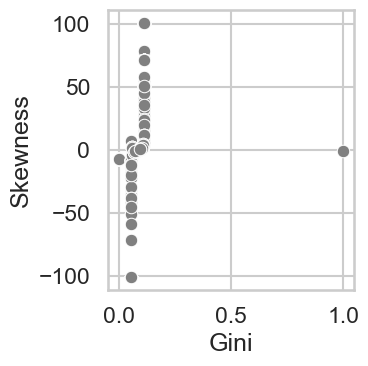

In [8]:
# fig, ax = plt.subplots(1,3,figsize=(12, 4))
fig, ax = plt.subplots(figsize=(4, 4))
fig = sns.scatterplot(data=raw_new, x="gini", y="skew_var", color='grey', ax=ax)
fig.axes.set_xlabel("Gini")
fig.axes.set_ylabel("Skewness")
# fig.set_title("Gini and Skewness Relationship")
fig.figure.tight_layout()
fig.figure.savefig("figs/gini_skew.pdf", bbox_inches="tight")
plt.show()

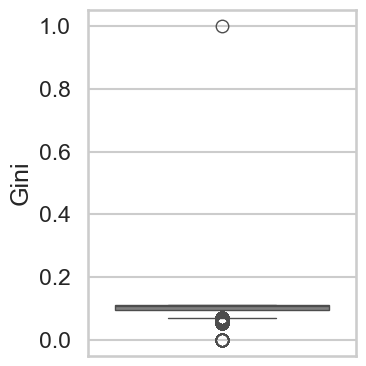

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))
fig = sns.boxplot(data=raw_new, y="gini", color='grey', ax=ax)
fig.axes.set_ylabel("Gini")
# fig.axes.set_title("Gini Distribution")
fig.figure.tight_layout()
fig.figure.savefig("figs/gini_distr.pdf", bbox_inches="tight")
plt.show()

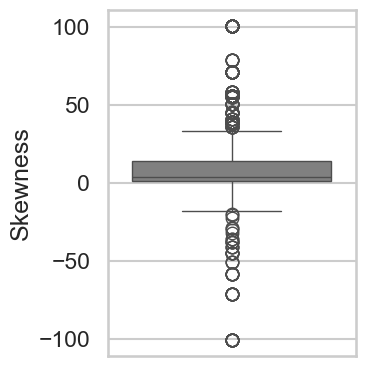

In [13]:
fig, ax = plt.subplots(figsize=(4, 4))
fig = sns.boxplot(data=raw_new, y="skew_var", color='grey', ax=ax)
fig.axes.set_ylabel("Skewness")
# fig.axes.set_title("Skewness Distribution")
fig.figure.tight_layout()
fig.figure.savefig("figs/skew_distr.pdf", bbox_inches="tight")
plt.show()

In [14]:
raw_new[raw_new['gini'] == 1]

,data,variable,correlation_true,mutual_info,unpriv_prob_pos,unpriv_unbalance,priv_unbalance,skew_var,gini,simpson,shannon,ir,pos_prob,statistical_parity,equal_opportunity,average_odds
5633,crime,MedNumBR,-0.380867,0.105544,0.0,0.0,1.0,-0.602467,1.0,0.001494,0.999701,0.554644,0.271357,0.281407,NaN,0.396488


<Axes: xlabel='statistical_parity', ylabel='average_odds'>

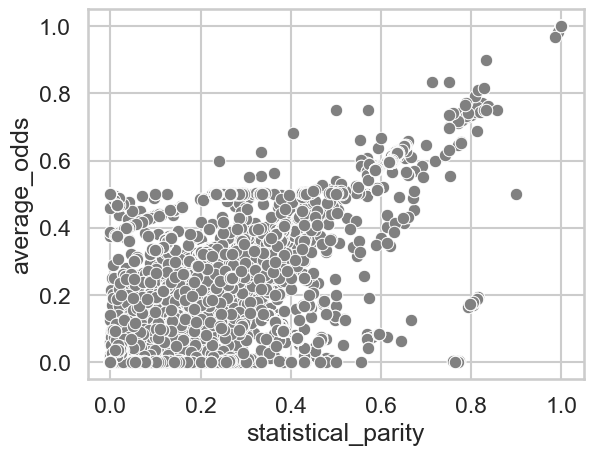

In [15]:
sns.scatterplot(data=raw_new, x="statistical_parity", y="average_odds", color='grey')